<a href="https://colab.research.google.com/github/connepi-projeto/projeto-anonimo-connepi/blob/main/connepi_notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost scikit-optimize ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=7c5bf6afb17d97a6dd96fc14f4d1bc4f0b6761c77abe5939b8f7075e1f7a400a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

In [ ]:
# IMPORTANDO BIBLIOTECAS

# MANEJAR DADOS
import pandas as pd
import numpy as np

# 2. PLOTAR DADOS
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. PREPROCESSAMENTO DOS DADOS
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from ydata_profiling import ProfileReport
# 4. Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Bibliotecas para separamento de cojuntos de dados
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV, cross_val_score,KFold,StratifiedKFold
from imblearn.over_sampling import SMOTE

# 6. Algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor
from xgboost import XGBClassifier


# 7. Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score,ConfusionMatrixDisplay , mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, auc


from concurrent.futures import ThreadPoolExecutor  # Biblioteca para programação em multi-thread, para diminuir tempo de execução das métricas

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# EDA

In [ ]:
df = pd.read_csv("./drive/MyDrive/notebooks/projetos/CONNEPI/Heart_disease_cleveland_new.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("your_report.html")

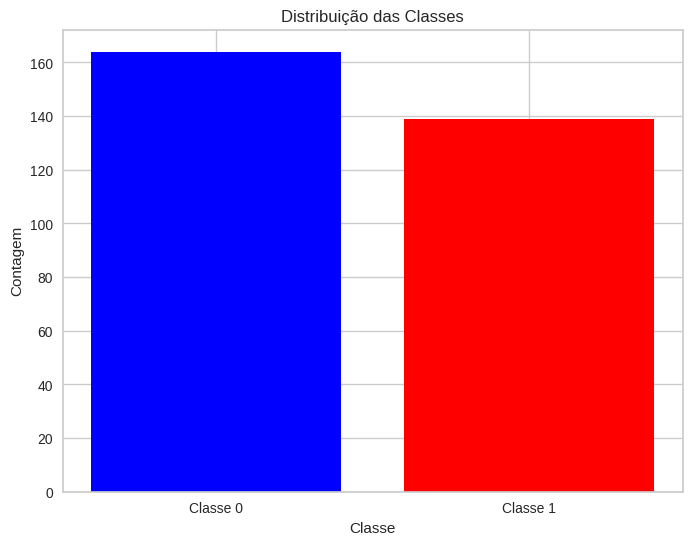

In [ ]:
class_counts = df['target'].value_counts()

# Plotagem do histograma ou gráfico de contagem
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição das Classes')
plt.xticks(class_counts.index, ['Classe 0', 'Classe 1'])  # Se suas classes forem binárias
plt.show()

Baseado no plot acima, podemos ver um leve desequilíbrio entre os targets. Mesmo sendo uma pequena diferença de 21 casos, irei realizar um balanceamento de classes utilizando SMOTE  (Synthetic Minority Over-sampling Technique) no futuro.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
X= df.drop(['target'], axis=1)
y = df['target']

In [ ]:
categorical_columns = ['thal', 'ca', 'slope', 'exang', 'restecg', 'cp', 'sex']

In [ ]:
X_encoded = X.copy()
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_encoded[col] = label_encoders[col].fit_transform(X[col])



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

#importing pipeline
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler  # 303
X_train, X_test, y_train, y_test  = train_test_split(X_encoded, y, test_size=0.1, random_state=42)
#277      #30     #277      #30

# Crie uma instância do MinMaxScaler
# scaler = MinMaxScaler()
smote = SMOTE()
# Ajuste o scaler aos dados e transforme os dados
# X_train_scaled = scaler.fit_transform(X_train)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# X_transformed = scaler.fit_transform(X_encoded)
# Transforme os dados de teste usando o scaler ajustado aos dados de treinamento
# X_test_scaled = scaler.transform(X_test)
# X_train, X_test = X_train_scaled,X_test_scaled


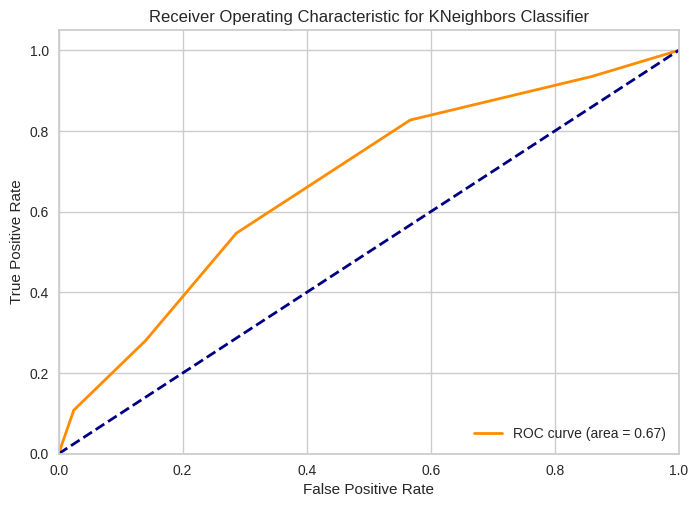

F1-Score for KNeighbors Classifier : 0.6666666666666667
Model: KNeighbors Classifier
Cross Validation Accuracy: 0.6370967741935484
Cross Validation Precision: 0.637072927072927
Test Accuracy: 0.6435643564356436
Test precision: 0.8333333333333334

[0.77419355 0.80645161 0.70967742 0.86666667 0.63333333 0.76666667
 0.73333333 0.83333333 0.66666667 0.8       ] [0.86666667 0.83333333 0.61111111 0.84615385 0.59090909 0.625
 0.7        1.         0.58333333 0.81818182]


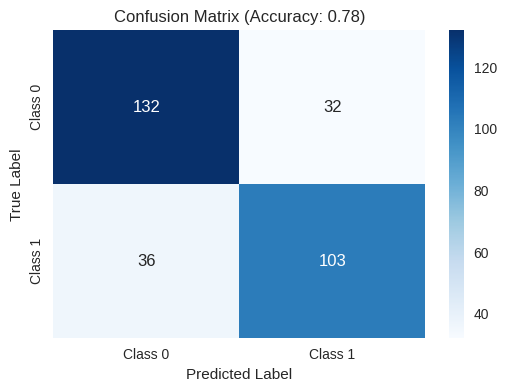

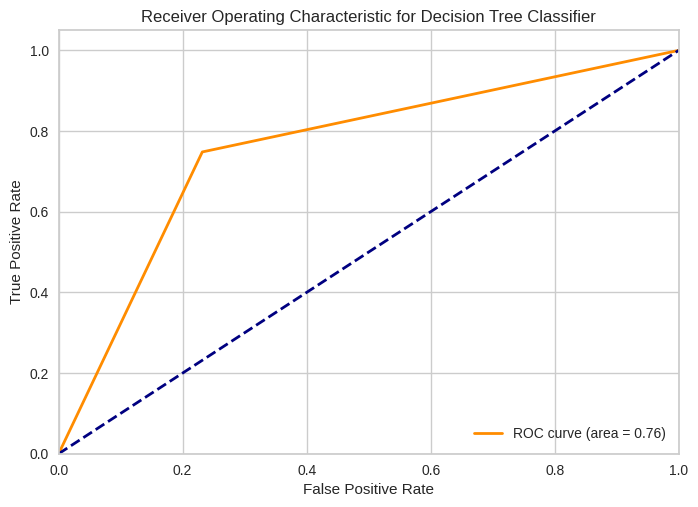

F1-Score for Decision Tree Classifier : 0.7878787878787877
Model: Decision Tree Classifier
Cross Validation Accuracy: 0.7590322580645161
Cross Validation Precision: 0.74746891996892
Test Accuracy: 0.7755775577557755
Test precision: 0.8666666666666667

[0.87096774 0.80645161 0.64516129 0.83333333 0.86666667 0.93333333
 0.73333333 0.8        0.8        0.8       ] [0.88888889 0.9        0.5625     0.78571429 0.92307692 0.84615385
 0.66666667 0.92857143 0.8        0.73333333]


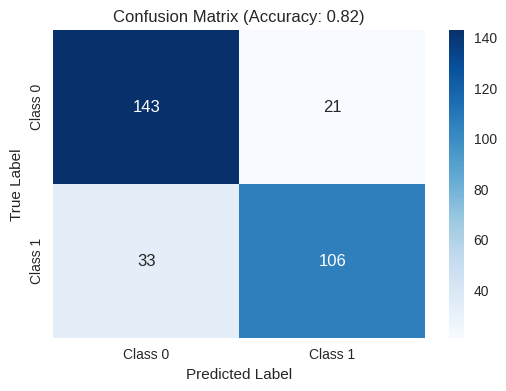

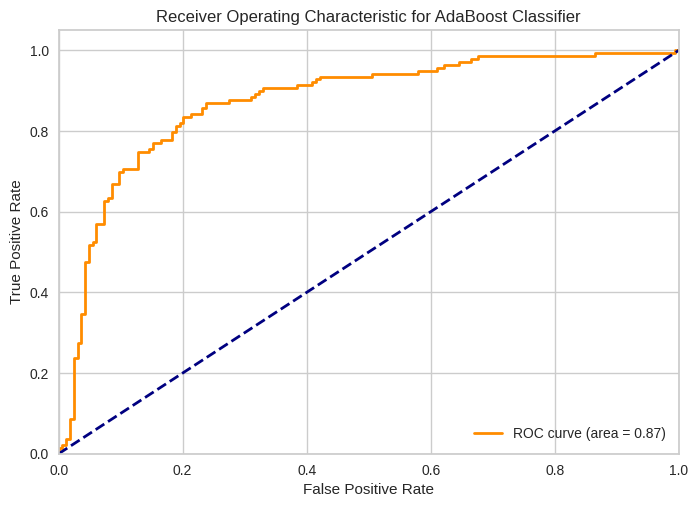

F1-Score for AdaBoost Classifier : 0.8888888888888888
Model: AdaBoost Classifier
Cross Validation Accuracy: 0.8089247311827956
Cross Validation Precision: 0.8034905372405372
Test Accuracy: 0.8217821782178217
Test precision: 0.8888888888888888

[0.93548387 0.83870968 0.70967742 0.9        0.8        0.9
 0.73333333 0.8        0.83333333 0.83333333] [0.94444444 0.84615385 0.64285714 0.91666667 0.90909091 0.78571429
 0.7        0.92857143 0.81818182 0.78571429]


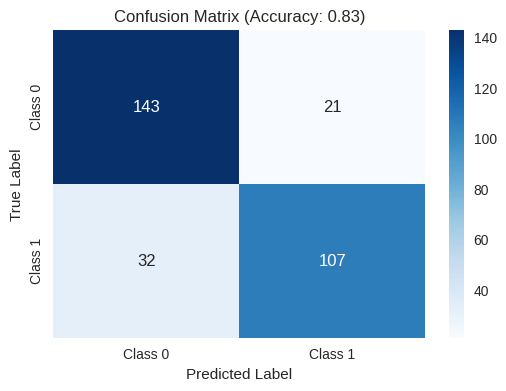

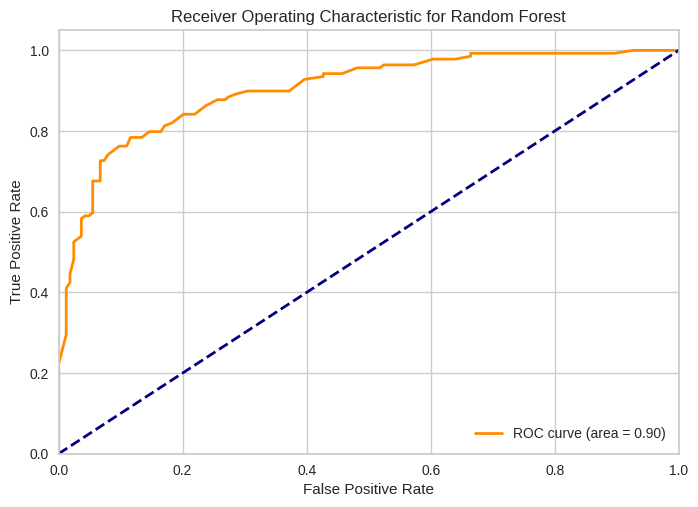

F1-Score for Random Forest : 0.9714285714285714
Model: Random Forest
Cross Validation Accuracy: 0.8283870967741935
Cross Validation Precision: 0.8277394827394827
Test Accuracy: 0.8250825082508251
Test precision: 1.0

[0.93548387 0.83870968 0.61290323 0.86666667 0.86666667 0.9
 0.66666667 0.8        0.76666667 0.83333333] [0.94444444 0.90909091 0.53333333 0.90909091 0.92307692 0.83333333
 0.57142857 0.92857143 0.77777778 0.78571429]


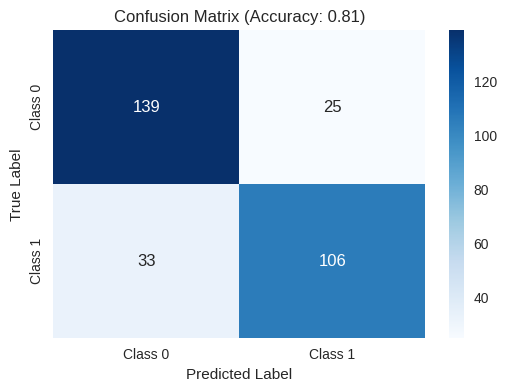

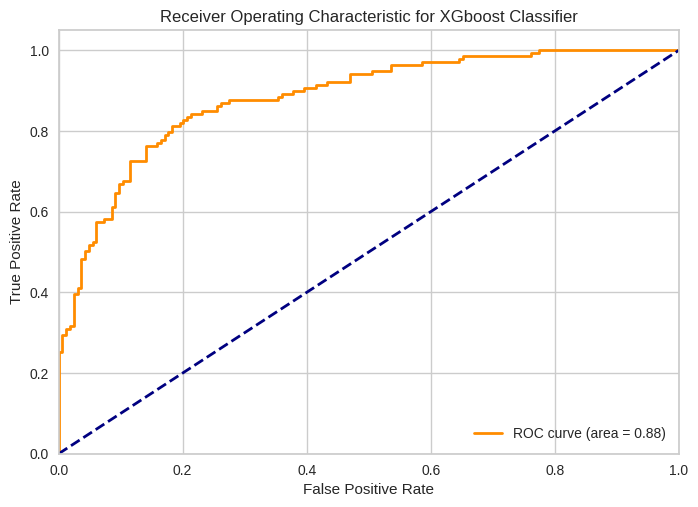

F1-Score for XGboost Classifier : 0.9444444444444444
Model: XGboost Classifier
Cross Validation Accuracy: 0.808709677419355
Cross Validation Precision: 0.8115861915861915
Test Accuracy: 0.8085808580858086
Test precision: 0.9444444444444444

[0.93548387 0.87096774 0.74193548 0.9        0.93333333 0.9
 0.76666667 0.8        0.83333333 0.8       ] [0.94444444 0.85714286 0.66666667 0.91666667 1.         0.78571429
 0.77777778 0.92857143 0.81818182 0.73333333]


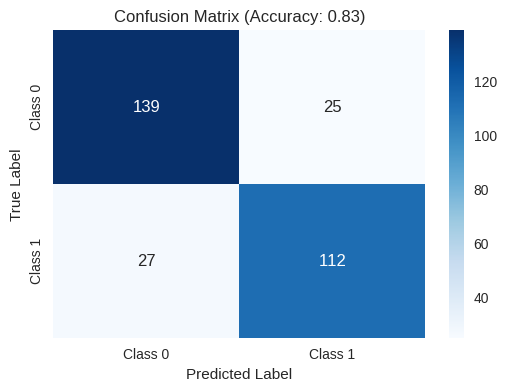

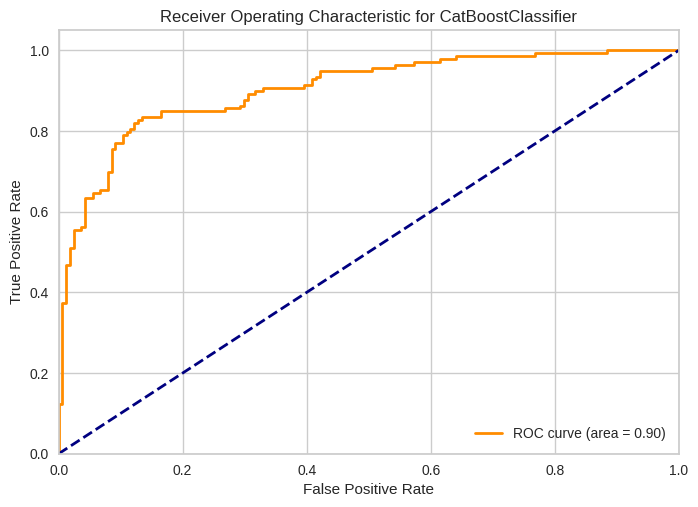

F1-Score for CatBoostClassifier : 0.9444444444444444
Model: CatBoostClassifier
Cross Validation Accuracy: 0.8481720430107528
Cross Validation Precision: 0.8428499278499277
Test Accuracy: 0.8283828382838284
Test precision: 0.9444444444444444

[0.64516129 0.61290323 0.61290323 0.66666667 0.7        0.7
 0.56666667 0.63333333 0.73333333 0.6       ] [0.88888889 0.6        0.53846154 0.66666667 0.875      0.625
 0.44444444 0.81818182 0.83333333 0.55555556]


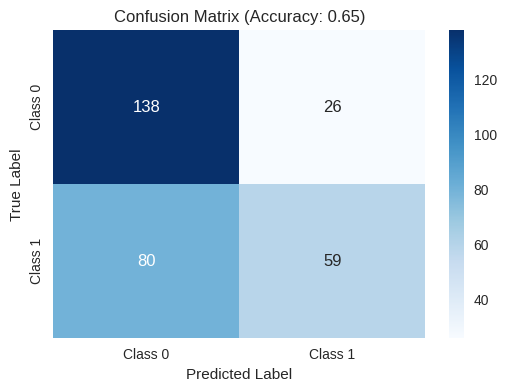

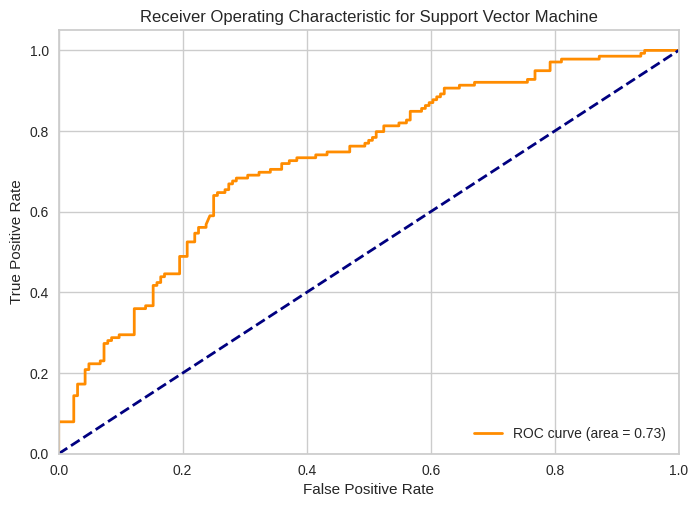

F1-Score for Support Vector Machine : 0.5925925925925926
Model: Support Vector Machine
Cross Validation Accuracy: 0.6470967741935483
Cross Validation Precision: 0.6845532245532244
Test Accuracy: 0.6501650165016502
Test precision: 0.8888888888888888

[0.83870968 0.90322581 0.80645161 0.9        0.86666667 0.9
 0.7        0.83333333 0.86666667 0.83333333] [0.88235294 0.92307692 0.76923077 0.85714286 0.92307692 0.78571429
 0.63636364 0.93333333 0.83333333 0.83333333]


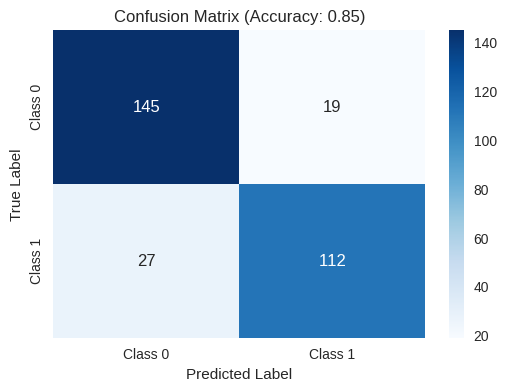

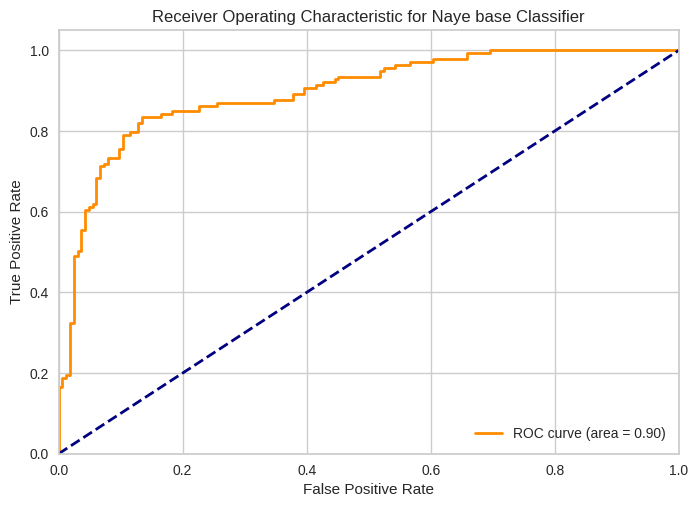

F1-Score for Naye base Classifier : 0.8571428571428571
Model: Naye base Classifier
Cross Validation Accuracy: 0.8448387096774195
Cross Validation Precision: 0.8376958335781864
Test Accuracy: 0.8481848184818482
Test precision: 0.8823529411764706



In [ ]:

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),
    ('CatBoostClassifier', CatBoostClassifier(random_state=42, verbose=0)),
    ('Support Vector Machine', SVC(random_state=42,probability=True )),
    ('Naye base Classifier', GaussianNB())
]
# Lista para armazena os nomes dos modelose suas respectivas acurácias
model_names = []
test_accuracies = []
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Itera todos os modelos e checa sua perfomance
for name, model in models:
    pipeline = Pipeline([

        ('model', model)
    ])

    # Executa cross-validation
    scores = cross_val_score(pipeline, X_encoded, y, cv=kfold, scoring='accuracy')
    cross_precision = cross_val_score(pipeline, X_encoded, y, cv=kfold, scoring='precision')
    print(scores, cross_precision)
    # Calcula mean accuracy
    mean_accuracy = scores.mean()
    mean_precision = cross_precision.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_pred_cross = cross_val_predict(pipeline, X_encoded, y, cv=kfold)

    # Calcula accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)




    y_predd = cross_val_predict(model, X_encoded, y, cv=10)
    cm = confusion_matrix(y, y_predd)

    # Extrair os valores TP, TN, FP, FN da matriz de confusão
    TN, FP, FN, TP = cm.ravel()

    # Calcular a acurácia
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


    # Calcula a curva ROC
    y_probas = cross_val_predict(pipeline, X_encoded, y, cv=kfold, method='predict_proba')

    fpr, tpr, thresholds = roc_curve(y, y_probas[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plota a curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for ' + name)
    plt.legend(loc="lower right")
    plt.show()

    # F1-Score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score for", name, ":", f1)

    # Store model name and test accuracy
    model_names.append(name)
    test_accuracies.append(mean_accuracy)

    # Imprime as métricas de cada um dos modelos
    print("Model:", name)
    print("Cross Validation Accuracy:", mean_accuracy)
    print("Cross Validation Precision:", mean_precision)

    print("Test Accuracy:", accuracy)
    print("Test precision:", precision)

    print()




In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Atráves das métricas de cada um dos modelos e do último plot, podemos ver que de cara os modelos mais robustos são:  Naye base, CatBoostClassifier e Random Forest
> Adicionar aspas



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def random_grid_search(model,model_name,param_grid,n_iter, scoring, cv):

  random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iter, cv=cv, scoring=scoring, random_state=42, n_jobs=1)
  random_search.fit(X_train, y_train)
  best_params = random_search.best_params_
  best_model = random_search.best_estimator_
  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print(f" {model_name} Best hyperparameters:", best_params)
  print("Accuracy on test set:", accuracy)
  return {'best_params': best_params, 'best_model':best_model}

In [ ]:
def hyperparameter_tuning(X, y, categorical_columns, models):
    results = {}

    # Encode categorical columns
    X_encoded = X.copy()
    label_encoders = {}
    for col in categorical_columns:

      label_encoders[col] = LabelEncoder()
      X_encoded[col] = label_encoders[col].fit_transform(X[col])

    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Definindo os parâmetros do grid para fazer o tunning
        param_grid = {}
        if model_name == 'Logistic Regression':
            param_grid = {
              'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 200, 300]
            }

        elif model_name == 'KNN':
            param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
            param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
            param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
        elif model_name == 'Decision Tree':
            param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        elif model_name == 'Random Forest':
            param_grid = {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 15],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt'],
                'bootstrap': [True, False],
                'class_weight': ['balanced', None]
            }
        elif model_name == 'XGBoost':
            param_grid = {
                'learning_rate': [0.001, 0.01, 0.1],  # Adicionando 0.1
                'n_estimators': [100, 200, 300],
                'eval_metric': ['logloss', 'accuracy'],
                'max_depth': [3, 5, 7, 9],  # Adicionando 9
                'min_child_weight': [1, 3, 5],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'gamma': [0, 0.1, 0.3, 0.5],  # Adicionando 0.5
                'reg_alpha': [0, 0.1, 0.5, 1.0],  # Adicionando 1.0
                'reg_lambda': [1, 1.5, 2, 3.0]  # Adicionando 3.0
            }


        elif model_name == 'GradientBoosting':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

        elif model_name == 'AdaBoost':
            param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
        elif model_name == 'CatBoostClassifier':
            param_grid = {
              'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [50, 100, 200],
              'l2_leaf_reg': [1, 3, 5],
              'border_count': [32, 64, 128],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bylevel': [0.6, 0.8, 1.0],
              'depth': [6, 8, 10],
              'class_weights': [[1, 2], [1, 5], [1, 10]],
              'random_strength': [0.1, 0.5, 1],
              'bagging_temperature': [0, 1, 10],
              'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide']
            }
        results = random_grid_search(model,model_name,param_grid,40,'accuracy',10)


# NESSE DICIONÁRIO EU DEFINO QUAIS MODELOS IRÃO PASSAR PELO RANDOM GRID SEARCH
models = {
    # "Logistic Regression": LogisticRegression(),
    # "KNN": KNeighborsClassifier(),
    # "NB": GaussianNB(),
    # "SVM": SVC(),
    # 'GradientBoosting': GradientBoostingClassifier(),
    # "Decision Tree": DecisionTreeClassifier(),
    # "Random Forest": RandomForestClassifier(),
    # "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    'CatBoostClassifier': CatBoostClassifier(random_state=42, verbose=0),
}

hyperparameter_tuning(X, y, categorical_cols, models)

In [ ]:

def plot_confusion_matrix(model,cv):
    y_pred = cross_val_predict(model, X_encoded, y, cv=cv)
    cm = confusion_matrix(y, y_pred)

    # Extrair os valores TP, TN, FP, FN da matriz de confusão
    TN, FP, FN, TP = cm.ravel()

    # Calcular a acurácia
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def kfold_evaluate(model, k):
    resultados = {
        "Acurácia": None,
        "Precisão": None,
        "F1-score": None,
        "Recall": None
    }


    def plot_results():
        # Criando o gráfico de barras
        fig, ax = plt.subplots()
        barras = ax.bar(resultados.keys(), resultados.values(), color=['blue', 'green', 'orange', 'red'])

        # Adicionando os valores acima das barras
        for barra in barras:
            altura = barra.get_height()
            ax.annotate(f'{round(altura*100)}%', xy=(barra.get_x() + barra.get_width() / 2, altura),
                        xytext=(0, 3),  # 3 pixels de deslocamento vertical
                        textcoords="offset points",
                        ha='center', va='bottom')

        # Adicionando título e rótulos aos eixos
        ax.set_ylabel('Porcentagem')
        ax.set_title('Resultados da validação cruzada')
        plt.ylim(0, max(resultados.values()) * 1.2)  # Limitando o eixo y
        plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para facilitar a leitura

        # Exibindo o gráfico
        plt.tight_layout()
        plt.show()

    # Calculando as métricas
    resultados["Precisão"] = np.mean(cross_val_score(model, X_smote, y_smote, cv=k, scoring='precision'))
    resultados["Acurácia"] = np.mean(balanced_accuracy_score(model, X_smote, y_smote, cv=k, scoring='accuracy'))
    resultados["Recall"] = np.mean(cross_val_score(model, X_smote, y_smote, cv=k, scoring='recall'))
    resultados["F1-score"] = np.mean(cross_val_score(model, X_smote, y_smote, cv=k, scoring='f1'))

    # Plotando os resultados
    plot_results()


In [ ]:
def train_test_evaluate(model, params, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=test_size, random_state=42)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    X_train, y_train = X_train_resampled, y_train_resampled
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Avaliar as métricas
    accuracy = (accuracy_score(y_test, y_pred))
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    labels = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
    valores = [accuracy, precision,f1, recall]
    x = np.arange(len(labels))  # Localização dos rótulos no eixo x

    # Configurando o gráfico de barras
    plt.bar(x, valores, color=['blue', 'green', 'red', 'yellow'])
    plt.xlabel('Métricas')
    plt.ylabel('Valores')
    plt.xticks(x, labels)

    # Adicionando os valores exatos como labels nas barras
    for i in range(len(x)):
        plt.text(x[i], valores[i], f'{valores[i]:.0%}', ha='center', va='bottom')
    plt.xlabel('Métricas')
    plt.ylabel('Valores')
    plt.xticks(x, labels)
    plt.title('Acurácia e Precisão do Modelo')
    plt.show()
    # print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1-score: {f1}\n")


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, params, title, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_encoded, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# XGBoost

In [ ]:
params2={'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'n_estimator': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 0.6}
params_xgb = {'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'eval_metric': 'logloss', 'colsample_bytree': 0.8}

KFOLD = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

TEST_SIZE = 0.1

kfold_evaluate(XGBClassifier(**params_xgb), KFOLD)




























































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































# Random Forest

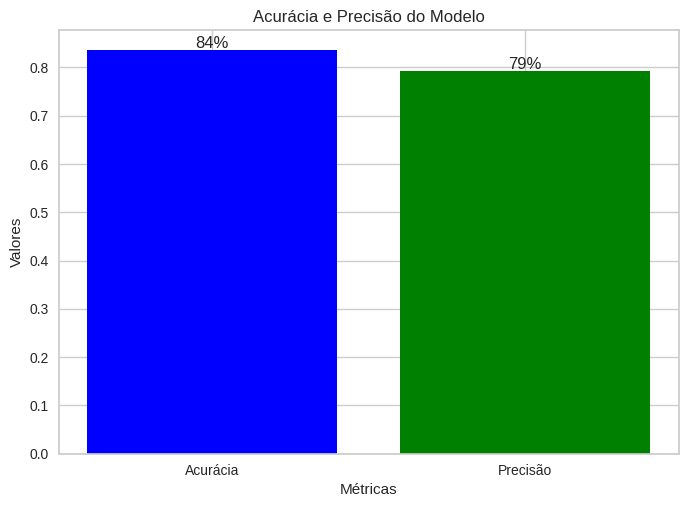

In [ ]:
params2 =  {"criterion": "gini", "max_depth": 8, "max_features":"auto", "n_estimators": 200}
TEST_SIZE = 0.3
KFOLD = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# kfold_evaluate(RandomForestClassifier(), KFOLD)
train_test_evaluate(RandomForestClassifier(), params2, TEST_SIZE)

# title = "Learning Curves"
# plot_learning_curve(RandomForestClassifier(**params2), params2, title, cv=KFOLD)
# plt.show()





# AdaBoost

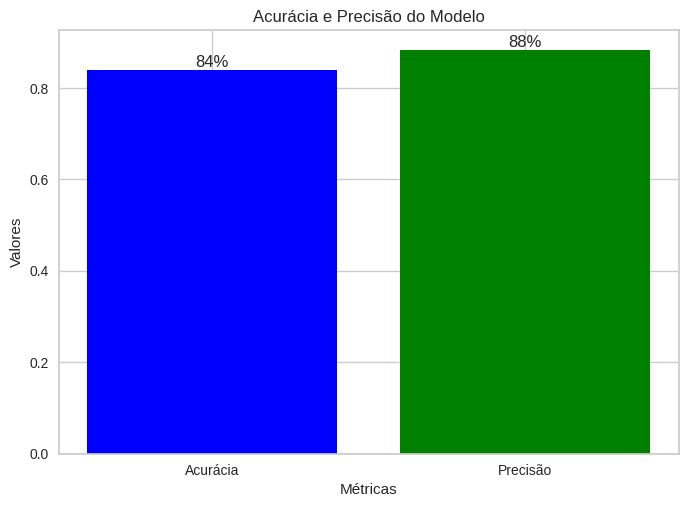

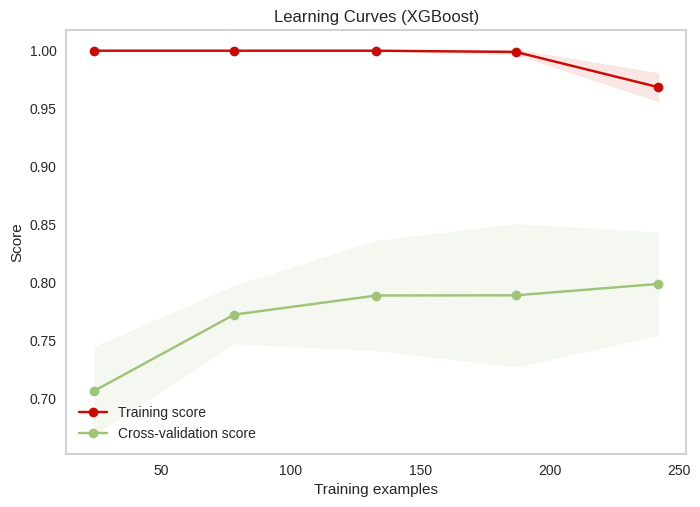

In [ ]:
params={'n_estimators': 250,  'learning_rate': 0.6, 'random_state':42}
KFOLD = 10
KFOLD = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

TEST_SIZE = 0.1

# kfold_evaluate(AdaBoostClassifier(), params, KFOLD)
train_test_evaluate(AdaBoostClassifier(**params), params, TEST_SIZE)

title = "Learning Curves (XGBoost)"
plot_learning_curve(AdaBoostClassifier(**params), params, title, cv=KFOLD)
plt.show()

# CatBoost

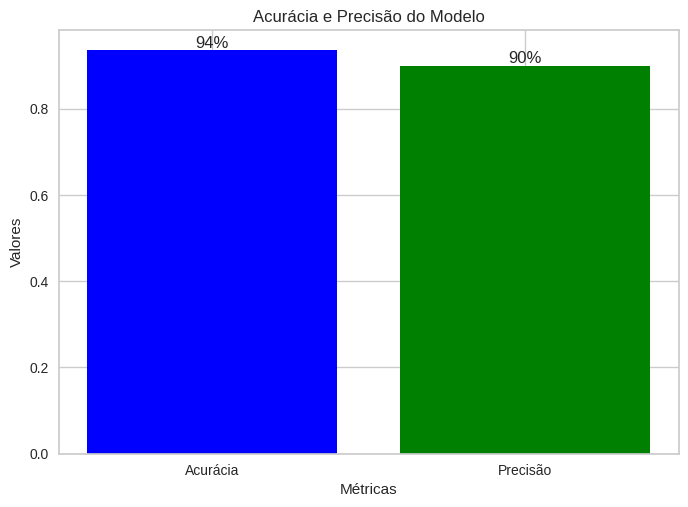

In [ ]:
params={'n_estimators': 300,  'learning_rate': 0.001, 'random_state':42, "verbose":0 , 'depth':4,'loss_function':'Logloss','class_weights':[1,1.15]}

KFOLD = 10
TEST_SIZE = 0.1
KFOLD = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
train_test_evaluate(CatBoostClassifier(), params, TEST_SIZE)

# kfold_evaluate(CatBoostClassifier(**params), KFOLD)



In [ ]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_encoded, y,)

# Ensemble Learning

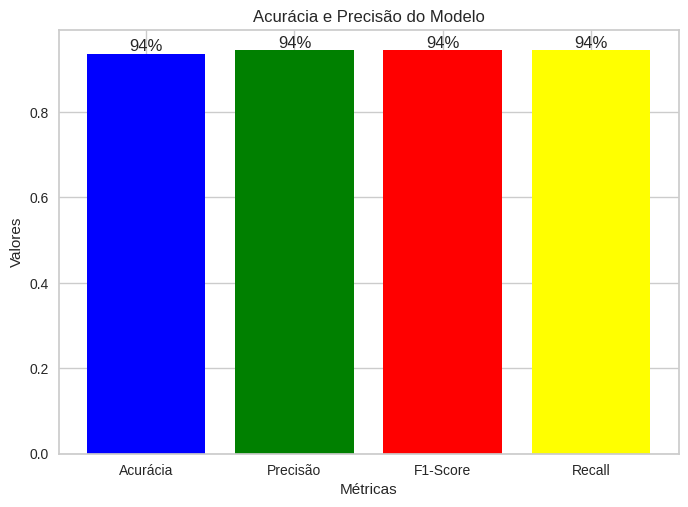

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

params_rf = {"criterion": "gini", "max_depth": 8, "max_features": "auto", "n_estimators": 200}
params_catboost = {'n_estimators': 300, 'learning_rate': 0.001, 'random_state': 42, 'verbose': 0, 'depth': 4, 'loss_function': 'Logloss', 'class_weights': [1, 1.15]}
params_ab = {'n_estimators': 250,  'learning_rate': 0.6, 'random_state':42}
params_nb = {'var_smoothing': 1e-09}
params_xgb={'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'n_estimator': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 0.6}
# params_xgb = {'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'eval_metric': 'logloss', 'colsample_bytree': 0.8}
logistic_rg_params = {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 10}
params_gb = {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.2}

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Random Forest, CatBoost, XGBoost, Nayes BAyes, AdaBoost, Logistic Regression, Gradient Boost
rf_model = RandomForestClassifier(**params_rf)
catboost_model = CatBoostClassifier(**params_catboost)
xgb_model = XGBClassifier(**params_xgb)
nb_model = GaussianNB(**params_nb)
ab_model = AdaBoostClassifier(**params_ab)
lg_model = LogisticRegression(**logistic_rg_params)
gb_model = GradientBoostingClassifier(**params_gb)

# ensemble_weights =  [1, 2, 1, 1, 2, 1]
# ensemble_weights = [1, 4, 1, 1, 2, 1]
ensemble_weights = [1, 7, 1, 1, 2, 1]
TEST_SIZE = 0.1
ensemble = VotingClassifier(estimators=[
    ('lg', lg_model),
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('catboost', catboost_model),
    ('ab', ab_model),
    ('nb', nb_model)
    ], voting='hard', weights=ensemble_weights)
# kfold_evaluate(ensemble, kf)
train_test_evaluate(ensemble, {}, TEST_SIZE)


{'weights': [1, 7, 1, 1, 2, 1]}


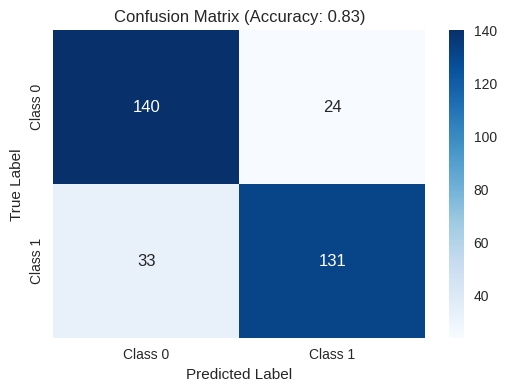

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Seus parâmetros para os modelos
params_rf = {"criterion": "gini", "max_depth": 8, "max_features": "auto", "n_estimators": 200}
params_catboost = {'n_estimators': 300, 'learning_rate': 0.001, 'random_state': 42, 'verbose': 0, 'depth': 4, 'loss_function': 'Logloss', 'class_weights': [1, 1.15]}
params_ab = {'n_estimators': 250,  'learning_rate': 0.6, 'random_state':42}
params_nb = {'var_smoothing': 1e-09}
params_xgb={'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'n_estimator': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0, 'eval_metric': 'logloss', 'colsample_bytree': 0.6}
logistic_rg_params = {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 10}
params_gb = {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.2}
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_encoded, y,)
# Define os modelos
models = {
    'lg': LogisticRegression(**logistic_rg_params),
    'xgb': XGBClassifier(**params_xgb),
    'rf': RandomForestClassifier(**params_rf),
    'catboost': CatBoostClassifier(**params_catboost),
    'ab': AdaBoostClassifier(**params_ab),
    'nb': GaussianNB(**params_nb)
}
estimators = list(models.items())
# Defina o VotingClassifier com os modelos
ensemble = VotingClassifier(estimators=estimators, voting='hard')

# Define a grade de hiperparâmetros para a pesquisa em grade
weights_lists = [
    [1, 7, 1, 1, 2, 1],
]

# Gere todas as combinações possíveis
param_grid = {'weights': weights_lists}


# Define a validação cruzada
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Aplica GridSearchCV
grid_search = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=kf, scoring='accuracy')

grid_search.fit(X_smote, y_smote)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print(best_params)

# Treina o ensemble com os melhores hiperparâmetros
ensemble_best = VotingClassifier(estimators=estimators, voting='hard', weights=best_params['weights'])
ensemble_best.fit(X_smote, y_smote)
# kfold_evaluate(ensemble_best, kf)

# Avalia o desempenho do modelo final
y_pred = cross_val_predict(ensemble_best, X_smote, y_smote, cv=kf)
cm = confusion_matrix(y_smote, y_pred)
TN, FP, FN, TP = cm.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
